# Individual Project - RevoU
Name: Mohamad Rifki Ilham

10 July 2023

[Presentation link](https://docs.google.com/presentation/d/1vIRsUnW-rRVIl7Jx76y-hLvrJTLhKfykjy4GCHMDzps/edit?usp=sharing)

In [ ]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
# Open Google Sheet file Users
sheet_url = 'https://docs.google.com/spreadsheets/d/10F0P-K-jsCZjJmPAipN-hFWugjs7ZOlg/edit#gid=1503844897'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
df_netflix = pd.read_csv(sheet_url_trf)
df_netflix.head()

https://docs.google.com/spreadsheets/d/10F0P-K-jsCZjJmPAipN-hFWugjs7ZOlg/export?format=csv&gid=1503844897


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51.0,['documentation'],['US'],1.0,NaN,NaN,NaN,0.6,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114.0,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109.0,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.01,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91.0,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150.0,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [ ]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5822 non-null   object 
 1   title                 5821 non-null   object 
 2   type                  5822 non-null   object 
 3   description           5804 non-null   object 
 4   release_year          5694 non-null   object 
 5   age_certification     3137 non-null   object 
 6   runtime               5694 non-null   float64
 7   genres                5694 non-null   object 
 8   production_countries  5694 non-null   object 
 9   seasons               2018 non-null   float64
 10  imdb_id               5303 non-null   object 
 11  imdb_score            5231 non-null   float64
 12  imdb_votes            5216 non-null   float64
 13  tmdb_popularity       5608 non-null   object 
 14  tmdb_score            5402 non-null   float64
dtypes: float64(5), object

In [ ]:
# dropping columns we will not need
df_netflix.drop(['description','imdb_id','imdb_votes','tmdb_popularity'], axis=1, inplace=True)
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5822 non-null   object 
 1   title                 5821 non-null   object 
 2   type                  5822 non-null   object 
 3   release_year          5694 non-null   object 
 4   age_certification     3137 non-null   object 
 5   runtime               5694 non-null   float64
 6   genres                5694 non-null   object 
 7   production_countries  5694 non-null   object 
 8   seasons               2018 non-null   float64
 9   imdb_score            5231 non-null   float64
 10  tmdb_score            5402 non-null   float64
dtypes: float64(4), object(7)
memory usage: 500.5+ KB


#Handling Missing Value

In [ ]:
df_netflix.isnull().sum()

id                         0
title                      1
type                       0
release_year             128
age_certification       2685
runtime                  128
genres                   128
production_countries     128
seasons                 3804
imdb_score               591
tmdb_score               420
dtype: int64

In [ ]:
#Drop row that year of release and publisher contain N/A
df_netflix.dropna(subset=['title','type','release_year','runtime','genres','production_countries'], inplace=True)

In [ ]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5693 entries, 0 to 5821
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5693 non-null   object 
 1   title                 5693 non-null   object 
 2   type                  5693 non-null   object 
 3   release_year          5693 non-null   object 
 4   age_certification     3137 non-null   object 
 5   runtime               5693 non-null   float64
 6   genres                5693 non-null   object 
 7   production_countries  5693 non-null   object 
 8   seasons               2018 non-null   float64
 9   imdb_score            5231 non-null   float64
 10  tmdb_score            5402 non-null   float64
dtypes: float64(4), object(7)
memory usage: 533.7+ KB


In [ ]:
df_netflix.isnull().sum()

id                         0
title                      0
type                       0
release_year               0
age_certification       2556
runtime                    0
genres                     0
production_countries       0
seasons                 3675
imdb_score               462
tmdb_score               291
dtype: int64

In [ ]:
df_netflix['age_certification'].fillna("Unknown", inplace = True)

In [ ]:
df_netflix['seasons'].fillna("None", inplace = True)

In [ ]:
df_netflix['imdb_score'].fillna("0", inplace = True)

In [ ]:
df_netflix['tmdb_score'].fillna("0", inplace = True)

In [ ]:
df_netflix.isnull().sum()

id                      0
title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
tmdb_score              0
dtype: int64

#Check Typo and Unique Value

In [ ]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5693 entries, 0 to 5821
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5693 non-null   object 
 1   title                 5693 non-null   object 
 2   type                  5693 non-null   object 
 3   release_year          5693 non-null   object 
 4   age_certification     5693 non-null   object 
 5   runtime               5693 non-null   float64
 6   genres                5693 non-null   object 
 7   production_countries  5693 non-null   object 
 8   seasons               5693 non-null   object 
 9   imdb_score            5693 non-null   object 
 10  tmdb_score            5693 non-null   object 
dtypes: float64(1), object(10)
memory usage: 533.7+ KB


In [ ]:
for i in ['type','age_certification','genres','production_countries']:
  unique_data = df_netflix[i].value_counts()
  print(unique_data,'\n')

MOVIE    3675
SHOW     2018
Name: type, dtype: int64 

Unknown    2556
TV-MA       864
R           554
TV-14       449
PG-13       444
PG          229
TV-PG       184
G           121
TV-Y7       115
TV-Y         94
TV-G         67
NC-17        16
Name: age_certification, dtype: int64 

['comedy']                                                                  475
['documentation']                                                           322
['drama']                                                                   315
['comedy', 'drama']                                                         133
['drama', 'romance']                                                        122
                                                                           ... 
['drama', 'western', 'documentation', 'action', 'crime']                      1
['action', 'comedy', 'drama', 'scifi', 'family', 'fantasy', 'animation']      1
['war', 'drama', 'thriller', 'crime', 'european']                        

#Convert Data Type

In [ ]:
df_netflix['imdb_score'] = df_netflix['imdb_score'].astype(int)

In [ ]:
df_netflix['tmdb_score'] = df_netflix['tmdb_score'].astype(int)

In [ ]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5693 entries, 0 to 5821
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5693 non-null   object 
 1   title                 5693 non-null   object 
 2   type                  5693 non-null   object 
 3   release_year          5693 non-null   object 
 4   age_certification     5693 non-null   object 
 5   runtime               5693 non-null   float64
 6   genres                5693 non-null   object 
 7   production_countries  5693 non-null   object 
 8   seasons               5693 non-null   object 
 9   imdb_score            5693 non-null   int64  
 10  tmdb_score            5693 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 533.7+ KB


#Check Duplicates

In [ ]:
df_netflix[df_netflix.duplicated()]

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,tmdb_score


#Outliers

i= 0 el runtime
i= 1 el imdb_score
i= 2 el tmdb_score


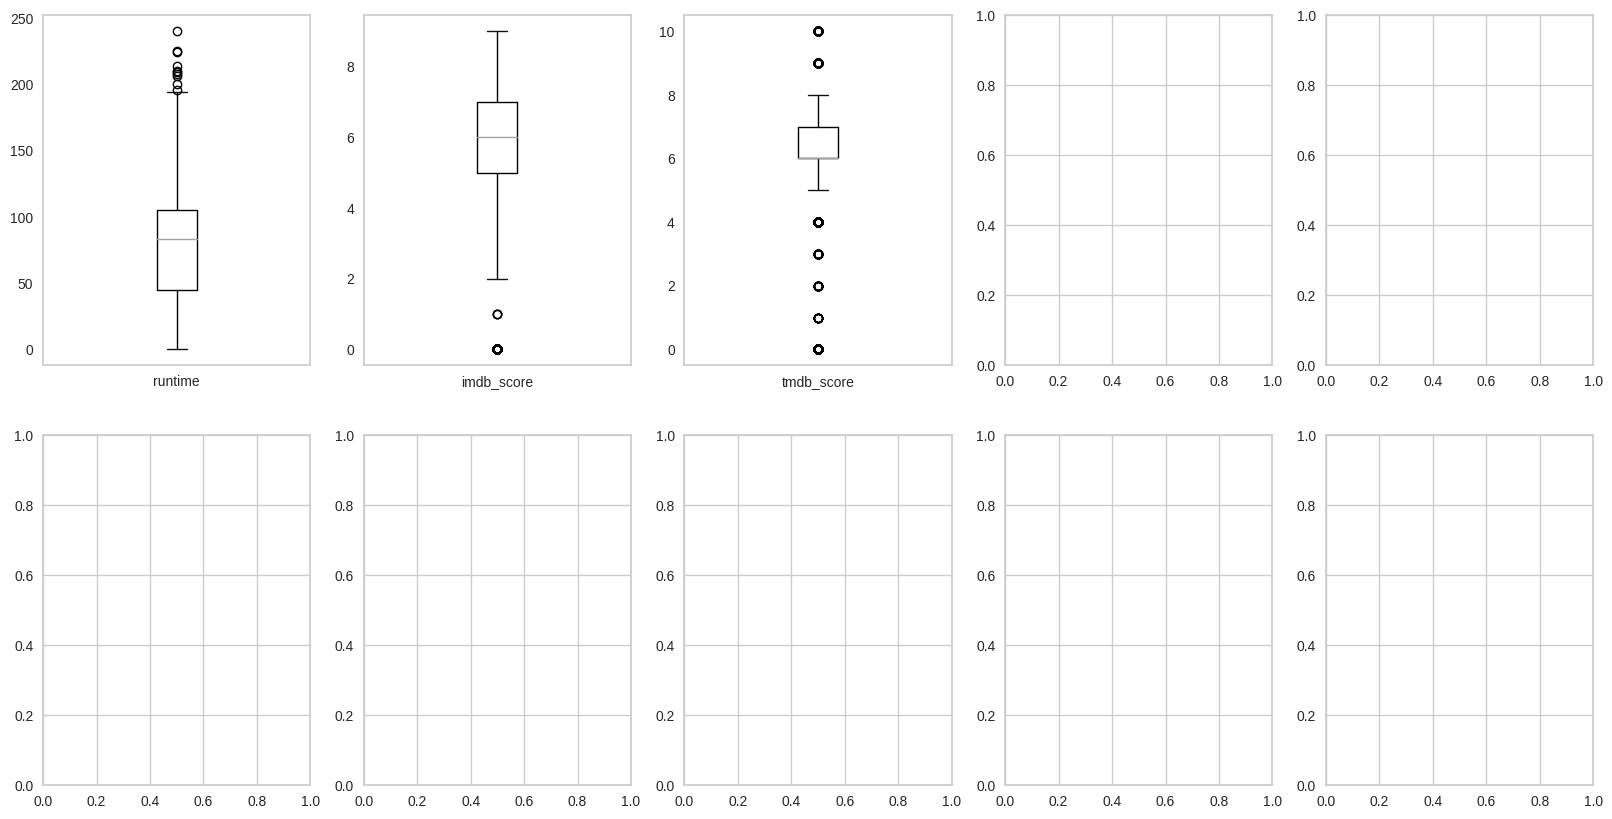

In [ ]:
numerical_column = ['runtime','imdb_score','tmdb_score']

fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(20,10))
for i,el in enumerate(numerical_column):
    print('i=',i,'el',el)
    a = df_netflix.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
from pickle import FALSE
df_netflix.to_excel('df_netflix.xlsx',index=FALSE)
from google.colab import files
files.download('df_netflix.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix_descstat = df_netflix.describe()
netflix_descstat = round(netflix_descstat,2)
netflix_descstat

,runtime,imdb_score,tmdb_score
count,5693.00,5693.00,5693.00
mean,77.45,5.57,6.08
std,38.74,2.01,1.83
min,0.00,0.00,0.00
25%,45.00,5.00,6.00
50%,83.00,6.00,6.00
75%,105.00,7.00,7.00
max,240.00,9.00,10.00


In [ ]:
df_netflix.describe(exclude = np.number)

,id,title,type,release_year,age_certification,genres,production_countries,seasons
count,5693,5693,5693,5693,5693,5693,5693,5693
unique,5693,5644,2,63,12,1690,444,26
top,ts300399,The Gift,MOVIE,2019,Unknown,['comedy'],['US'],None
freq,1,3,3675,816,2556,475,1924,3675


In [ ]:
# Score Frequency
IMDB = df_netflix["imdb_score"].round().value_counts().rename("IMDB")
TMDB = df_netflix["tmdb_score"].round().value_counts().rename("TMDB")
scoreFrequency = pd.concat([IMDB, TMDB], axis = 1)
scoreFrequency

,IMDB,TMDB
6,1726.0,1786
7,1537.0,1774
5,1014.0,813
0,462.0,292
8,456.0,647
4,332.0,164
3,111.0,32
2,35.0,25
9,17.0,79
1,3.0,11
